In [ ]:
# Ejercicio 3: Modifique el código de animation2_2 para usar la información de 'fve30.mat'. 
# Para las coordenadas 'x', 'y', 'z' utiliza un arreglo de números enteros aleatorios en el intevalo [0, 50]

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy.io
from matplotlib import animation
from IPython.display import HTML

In [2]:
# cargamos el archivo
archivo =r"C:\Users\ANEL\OneDrive\Escritorio\BCT\2019_03_03_BCT\data_and_demos\fve30.mat"

In [6]:
mat_json = scipy.io.loadmat(archivo)

mat_dict = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_dictmat_dict = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_dict

mat_dict.keys()

dict_keys(['Names', 'CIJ'])

In [7]:
for key in mat_dict.keys():
    print(mat_dict[key].shape, mat_dict[key].ndim)

(30,) 1
(30, 30) 2


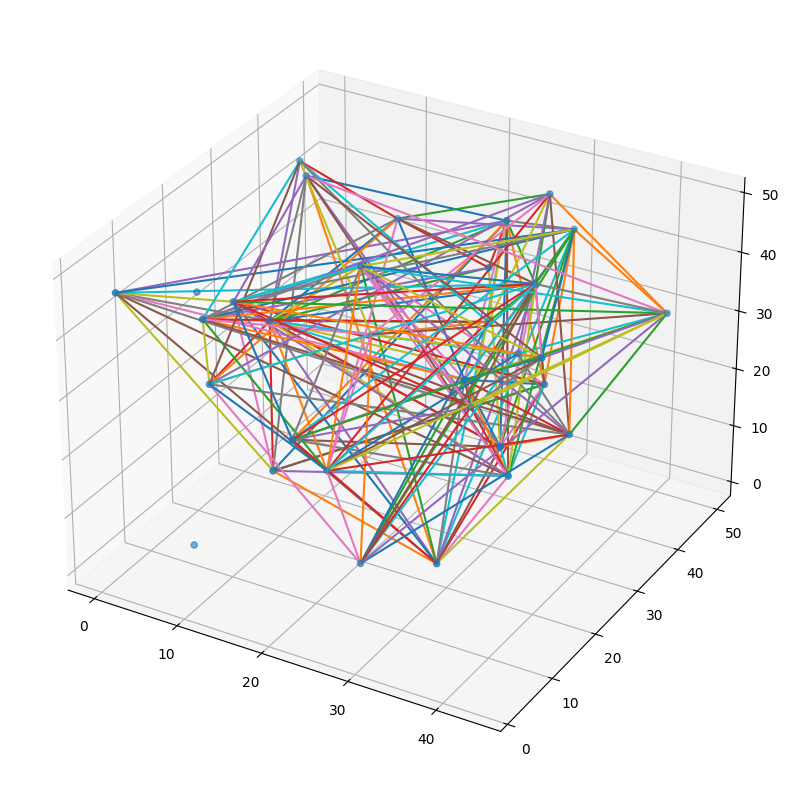

In [10]:
matadj = mat_json['CIJ']
G= nx.from_numpy_array(matadj)

# generar coordenadas aleatorias en el intervalo [0, 50]
num_nodos = G.number_of_nodes()
x = np.random.randint(0,51, size= 32)
y = np.random.randint(0,51, size= 32)
z= np.random.randint(0,51, size= 32)

# crear los arreglos de nodos y aristas
nodos = np.array([[i, j, k] for i, j, k in zip(x, y, z)])
edges = np.array([(nodos[u], nodos[v]) for u, v in G.edges()])

# configuramos el grafo
fig =plt.figure(figsize =(10,10))
ax = fig.add_subplot(111, projection= "3d")

# fx de iniciación
def init():
    ax.scatter(*nodos.T)
    for edge in edges:
        ax.plot(*edge.T)
    return fig,

# fx de animación

def animate(i):
    ax.view_init(elev = 20, azim= i*4)
    return fig, 

animacion =  animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=200, blit=False)